# **Actividad semanal - 04**
# **Ciencia y analítica de datos**

## **Nombre del profesor:** Jobish Vallikavungal Devassia

## **Nombre:** Yeison Fernando Villamil Franco, Diego Alberto Olarte Mira
## **Matrícula:** A01793803, A01794028
## **Fecha:** 11 de octubre/2022

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **Parte 1: Ejercicio guiado**

In [3]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(path)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### **Nombres de las columnas**

In [4]:
col = ['ID', 'Amount of the given credit', 'Gender', 'Education', 'Marital status', 'Age', 'the repayment status in September', 'the repayment status in August', 
       'the repayment status in July', 'the repayment status in June', 'the repayment status in May', 'the repayment status in April',
       'Amount of bill statement in September, 2005', 'Amount of bill statement in August, 2005', 'Amount of bill statement in July, 2005', 
       'Amount of bill statement in June, 2005', 'Amount of bill statement in May, 2005', 'Amount of bill statement in April, 2005',
       'Amount paid in September, 2005', 'Amount paid in August, 2005', 'Amount paid in July, 2005', 'Amount paid in June, 2005', 'Amount paid in May, 2005',
       'Amount paid in April, 2005', 'Class']
df.columns = col

### **Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

In [6]:
df.head()

,ID,Amount of the given credit,Gender,Education,Marital status,Age,the repayment status in September,the repayment status in August,the repayment status in July,the repayment status in June,...,"Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount paid in September, 2005","Amount paid in August, 2005","Amount paid in July, 2005","Amount paid in June, 2005","Amount paid in May, 2005","Amount paid in April, 2005",Class
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Aboradaremos el problema de reducción de dimensionalidad partiendo de varios componente característicos.

1. Debido a que existen valores nulos, se procederá a aplicar los pasos empleado en la tarea anterior para imputar o eliminar estos y tener un dataset limpio
2. Considerando que existen variables que son únicas como `Amount of the given credit`, `Gender`, `Education`, `Marital status`, `Age`. Dejaremos estas por fuera de la parte inicial de reducción de dimensionaidad, ya que pueden ser características propias individuales de cada cliente.
3. Existen tres tipos de variables que pueden coincidir: `Amount of bill statement`, `Amount paind in` y `the repayment status`, se procederá a reducir la dimensionalidad de cada una de estas variables.
4. Las variables mencionadas en el paso tres serán usadas en conjunto para ver que tanto cambiar la varianza en la reducción de dimensionalidad.

#### 1.1. Limpieza de datos

##### Variables categóricas

In [9]:
row_target = pd.isnull(df['Class'])
df_target = df[row_target]
df_target.head()

,ID,Amount of the given credit,Gender,Education,Marital status,Age,the repayment status in September,the repayment status in August,the repayment status in July,the repayment status in June,...,"Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount paid in September, 2005","Amount paid in August, 2005","Amount paid in July, 2005","Amount paid in June, 2005","Amount paid in May, 2005","Amount paid in April, 2005",Class
6232,6233,60000,2.0,2.0,2.0,29.0,2.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29824,29825,40000,1.0,1.0,1.0,47.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29825,29826,50000,1.0,2.0,1.0,41.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_v1 = df[~row_target].reset_index(drop=True)

In [11]:
row_gender = pd.isnull(df_v1['Gender'])
df_gender = df_v1[row_gender]

In [12]:
df_v2 = df_v1[~row_gender].reset_index(drop=True)

In [14]:
row_cat = pd.isnull(df_v2['Marital status'])
df_cat = df_v2[row_cat]
df_v2 = df_v2[~row_cat].reset_index(drop=True)
row_cat2 = pd.isnull(df_v2['Age'])
df_cat2 = df_v2[row_cat2]

In [15]:
datos_no_nulos = df_v2[~row_cat2].reset_index(drop=True)
datos_nonulos = datos_no_nulos[['Amount of the given credit', 'Age']]
agrupamiento_nonulos = datos_nonulos.groupby(pd.cut(datos_nonulos['Amount of the given credit'], np.arange(int(datos_nonulos['Amount of the given credit'].min())\
    ,int(datos_nonulos['Amount of the given credit'].max())+10000, int(datos_nonulos['Amount of the given credit'].min())))).median()

In [16]:
df_cat2 = df_cat2.reset_index(drop=True)
datos_imp = agrupamiento_nonulos.reset_index(drop=True)
row = 0
while row < df_cat2.shape[0]:
    for i in range(datos_imp.shape[0]-1):
        
        if df_cat2.loc[row, 'Amount of the given credit'] > datos_imp.loc[i, 'Amount of the given credit'] \
            and df_cat2.loc[row, 'Amount of the given credit'] <= datos_imp.loc[i+1, 'Amount of the given credit']:
            df_cat2.loc[row, 'Age'] = datos_imp.loc[i, 'Age']
    
    row = row+1

In [17]:
data_final = pd.concat([df_cat2, datos_no_nulos], axis=0)

##### Variables numéricas

In [18]:
col1_filter = [col for col in data_final.columns if col.startswith('Amount paid')]
col2_filter = [col for col in data_final.columns if col.startswith('Amount of bill')]
col3_filter = [col for col in data_final.columns if col.startswith('the repayment')]

In [19]:
row_data = pd.isnull(data_final['Amount of bill statement in May, 2005'])
data_search = data_final[row_data]

In [20]:
datos_no_nulos = data_final[~row_data].reset_index(drop=True)
datos_nonulos = datos_no_nulos[['Amount of the given credit', 'Amount of bill statement in May, 2005']]
agrupamiento_nonulos = datos_nonulos.groupby(pd.cut(datos_nonulos['Amount of the given credit'], np.arange(int(datos_nonulos['Amount of the given credit'].min())\
    ,int(datos_nonulos['Amount of the given credit'].max())+10000, int(datos_nonulos['Amount of the given credit'].min())))).median()

In [21]:
df_cat2 = data_search.reset_index(drop=True)
datos_imp = agrupamiento_nonulos.reset_index(drop=True)
row = 0
while row < df_cat2.shape[0]:
    for i in range(datos_imp.shape[0]-1):
        
        if df_cat2.loc[row, 'Amount of the given credit'] > datos_imp.loc[i, 'Amount of the given credit'] \
            and df_cat2.loc[row, 'Amount of the given credit'] <= datos_imp.loc[i+1, 'Amount of the given credit']:
            df_cat2.loc[row, 'Amount of bill statement in May, 2005'] = datos_imp.loc[i, 'Amount of bill statement in May, 2005']
    
    row = row+1

In [22]:
data_final.dropna(inplace = True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29961 entries, 0 to 29991
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           29961 non-null  int64  
 1   Amount of the given credit                   29961 non-null  int64  
 2   Gender                                       29961 non-null  float64
 3   Education                                    29961 non-null  float64
 4   Marital status                               29961 non-null  float64
 5   Age                                          29961 non-null  float64
 6   the repayment status in September            29961 non-null  float64
 7   the repayment status in August               29961 non-null  float64
 8   the repayment status in July                 29961 non-null  float64
 9   the repayment status in June                 29961 non-null  float64
 10

#### 1.2. PCA de las tres variables mencionadas (Paso 1)

#### **Variable:** the repayment status

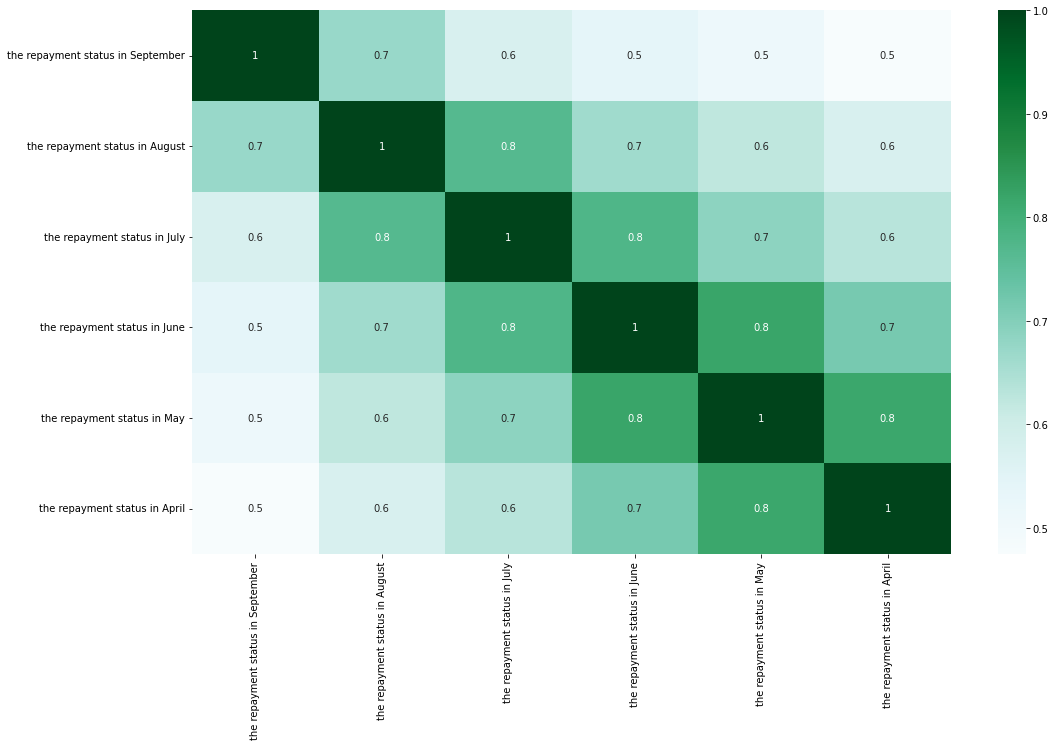

In [26]:
fig, ax = plt.subplots(figsize=(17,10))
pay_status = data_final[col3_filter]
cor_pay_status = pay_status.corr()
corr_map = sns.heatmap(cor_pay_status, annot=True, cmap='BuGn', fmt='.1g', ax=ax)

Se evidencia que existe una correlación positiva en todas las características `the paymente status in`. Esto es un indicio inicial de una posible reducción de componente, sin embargo, se analizará la covarianza y que tanto las componenete representan las varianzas de las misma.

In [40]:
var_pay = np.cov([data_final['the repayment status in September'], data_final['the repayment status in August'], data_final['the repayment status in July'], data_final['the repayment status in June'],\
                data_final['the repayment status in May'], data_final['the repayment status in April']])
var_frame = pd.DataFrame(var_pay, columns=col3_filter, index=col3_filter)
var_frame

,the repayment status in September,the repayment status in August,the repayment status in July,the repayment status in June,the repayment status in May,the repayment status in April
the repayment status in September,1.263257,0.904576,0.772539,0.708323,0.648793,0.613355
the repayment status in August,0.904576,1.433101,1.097937,0.926535,0.844471,0.791718
the repayment status in July,0.772539,1.097937,1.430360,1.086083,0.929592,0.869253
the repayment status in June,0.708323,0.926535,1.086083,1.365089,1.084350,0.961818
the repayment status in May,0.648793,0.844471,0.929592,1.084350,1.282095,1.062769
the repayment status in April,0.613355,0.791718,0.869253,0.961818,1.062769,1.320867


Conteo de la varianza en cada variable

In [37]:
var_col1 = data_final[col3_filter]
total= var_col1.var().sum()
var1, var2, var3, var4, var5, var6 = var_pay[0][0], var_pay[1][1], var_pay[2][2], var_pay[3][3], var_pay[4][4], var_pay[5][5]

In [72]:
print('Varianza total \t\t\t:', total.round(2) )
print(f'Varienza prop. {col3_filter[0]} \t:', ((var1/total)*100).round(2),'%' )
print(f'Varienza prop. {col3_filter[1]} \t:', ((var2/total)*100).round(2),'%' )
print(f'Varienza prop. {col3_filter[2]} \t:', ((var3/total)*100).round(2),'%' )
print(f'Varienza prop. {col3_filter[3]} \t:', ((var4/total)*100).round(2),'%' )
print(f'Varienza prop. {col3_filter[4]} \t:', ((var5/total)*100).round(2),'%' )
print(f'Varienza prop. {col3_filter[5]} \t:', ((var6/total)*100).round(2),'%' )

Varianza total 			: 8.09
Varienza prop. the repayment status in September 	: 16.32 %
Varienza prop. the repayment status in August 	: 15.84 %
Varienza prop. the repayment status in July 	: 16.86 %
Varienza prop. the repayment status in June 	: 17.67 %
Varienza prop. the repayment status in May 	: 17.7 %
Varienza prop. the repayment status in April 	: 15.61 %


Se videncia que la varianza se reparte en proporciones de similares magnitudes para cada una de las características analizadas. Realizaremos la reducción de dimensionalidad para `1` y `2` componenente, ya que es posible que con 1 solo componente se vea reflejada toda la varianza de las seis características.

In [45]:
pcs = PCA(n_components=2)

pcs.fit(var_col1)

pcsSummary = pd.DataFrame({'Desviación estandar': np.sqrt(pcs.explained_variance_),'Proporción de la varianza': pcs.explained_variance_ratio_,\
                          'Proporción acumulada': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(3)
pcsSummary

,PC1,PC2
Desviación estandar,2.412,0.959
Proporción de la varianza,0.719,0.114
Proporción acumulada,0.719,0.832


`PC1`cuenta solo el `71.9%` del total de variabilidad de las seis características. `PC2` cuenta `11.4%`. Intentaremos con tres componentes

In [52]:
pcs = PCA(n_components=4)
sc = StandardScaler()
scaled_var = sc.fit_transform(var_col1)
pcs.fit(scaled_var)

pcsSummary = pd.DataFrame({'Desviación estandar': np.sqrt(pcs.explained_variance_),'Proporción de la varianza': pcs.explained_variance_ratio_,\
                          'Proporción acumulada': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pcsSummary = pcsSummary.round(3)
pcsSummary

,PC1,PC2,PC3,PC4
Desviación estandar,2.073,0.837,0.637,0.515
Proporción de la varianza,0.717,0.117,0.068,0.044
Proporción acumulada,0.717,0.833,0.901,0.945


Para este caso, ya se puede observar que con tres componentes podemos explicar el 90% de la variabilidad de las seis características, siendo esta una buena alternativas para la reducción de dimensiones.

In [56]:
def display_scree_plot(pca, name='Scree plot'):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title(name)
    plt.show(block=False)

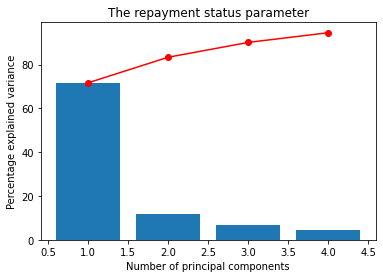

In [57]:
display_scree_plot(pcs, name='The repayment status parameter')

#### **Variable:** Amount of bill statement in

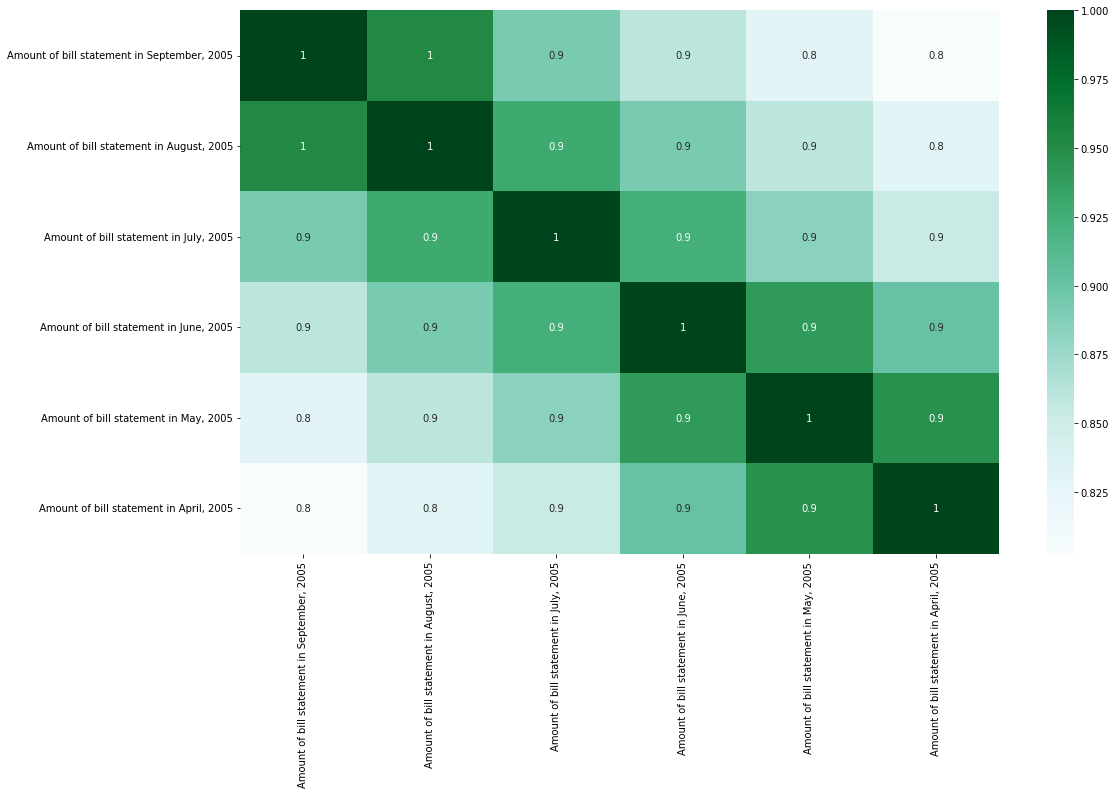

In [60]:
fig, ax = plt.subplots(figsize=(17,10))
amount_bill = data_final[col2_filter]
amount_bill_status = amount_bill.corr()
corr_map_2 = sns.heatmap(amount_bill_status, annot=True, cmap='BuGn', fmt='.1g', ax=ax)

Se evidencia en la mapa de calor de correlación, que estas variables presetan una mayor correlación entre ella. Analizaremos la reducción de dimensionalidad

In [69]:
sc2 = StandardScaler()
var_col2 = data_final[col2_filter]
scaled_var2 = sc2.fit_transform(var_col2)
scaled_var2_frame = pd.DataFrame(scaled_var2, columns=col2_filter)

In [71]:
var_amount_bill = np.cov([scaled_var2_frame['Amount of bill statement in September, 2005'], scaled_var2_frame['Amount of bill statement in August, 2005'], \
                scaled_var2_frame['Amount of bill statement in July, 2005'], scaled_var2_frame['Amount of bill statement in June, 2005'],scaled_var2_frame['Amount of bill statement in May, 2005'], \
                scaled_var2_frame['Amount of bill statement in April, 2005']])
var_frame2 = pd.DataFrame(var_amount_bill, columns=col2_filter, index=col2_filter)
var_frame2

,"Amount of bill statement in September, 2005","Amount of bill statement in August, 2005","Amount of bill statement in July, 2005","Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005"
"Amount of bill statement in September, 2005",1.000033,0.951517,0.892294,0.860285,0.829798,0.802666
"Amount of bill statement in August, 2005",0.951517,1.000033,0.928341,0.892490,0.859791,0.831602
"Amount of bill statement in July, 2005",0.892294,0.928341,1.000033,0.923987,0.883928,0.853334
"Amount of bill statement in June, 2005",0.860285,0.892490,0.923987,1.000033,0.940168,0.900957
"Amount of bill statement in May, 2005",0.829798,0.859791,0.883928,0.940168,1.000033,0.946215
"Amount of bill statement in April, 2005",0.802666,0.831602,0.853334,0.900957,0.946215,1.000033


In [74]:
var_col_2 = scaled_var2_frame
total2= var_col_2.var().sum()
var_1, var_2, var_3, var_4, var_5, var_6 = var_amount_bill[0][0], var_amount_bill[1][1], var_amount_bill[2][2], var_amount_bill[3][3], var_amount_bill[4][4], var_amount_bill[5][5]

In [75]:
print('Varianza total \t\t\t:', total2.round(2) )
print(f'Varienza prop. {col2_filter[0]} \t:', ((var_1/total2)*100).round(2),'%' )
print(f'Varienza prop. {col2_filter[1]} \t:', ((var_2/total2)*100).round(2),'%' )
print(f'Varienza prop. {col2_filter[2]} \t:', ((var_3/total2)*100).round(2),'%' )
print(f'Varienza prop. {col2_filter[3]} \t:', ((var_4/total2)*100).round(2),'%' )
print(f'Varienza prop. {col2_filter[4]} \t:', ((var_5/total2)*100).round(2),'%' )
print(f'Varienza prop. {col2_filter[5]} \t:', ((var_6/total2)*100).round(2),'%' )

Varianza total 			: 6.0
Varienza prop. Amount of bill statement in September, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in August, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in July, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in June, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in May, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in April, 2005 	: 16.67 %


Debido a la correlación tan fuerte existen entre cada una de las variables, es evidente que la varianza se distribuye de igual manera para cada una de las características. Procederemos a analizar 4 componentes para reducción de dimesionalidad y observar el comportamiento

In [78]:
pcs1 = PCA(n_components=4)
pcs1.fit(scaled_var2)

pcsSummary1 = pd.DataFrame({'Desviación estandar': np.sqrt(pcs1.explained_variance_),'Proporción de la varianza': pcs1.explained_variance_ratio_,\
                          'Proporción acumulada': np.cumsum(pcs1.explained_variance_ratio_)})
pcsSummary1 = pcsSummary1.transpose()
pcsSummary1.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pcsSummary1 = pcsSummary1.round(3)
pcsSummary1

,PC1,PC2,PC3,PC4
Desviación estandar,2.331,0.553,0.334,0.259
Proporción de la varianza,0.906,0.051,0.019,0.011
Proporción acumulada,0.906,0.957,0.975,0.986


Se evidencia que solo con `PC1` ya podemos explicar el `91%` de la variabilidad de los datos, con dos `PC2` se explica el `96%`. Todo esto se observa en el gráfico siguiente

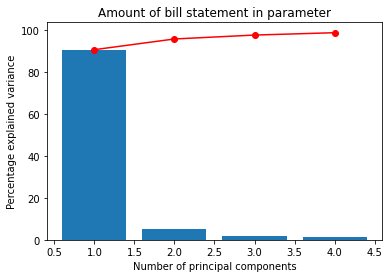

In [77]:
display_scree_plot(pcs1, name='Amount of bill statement in parameter')

#### **Variable:** Amount paid in

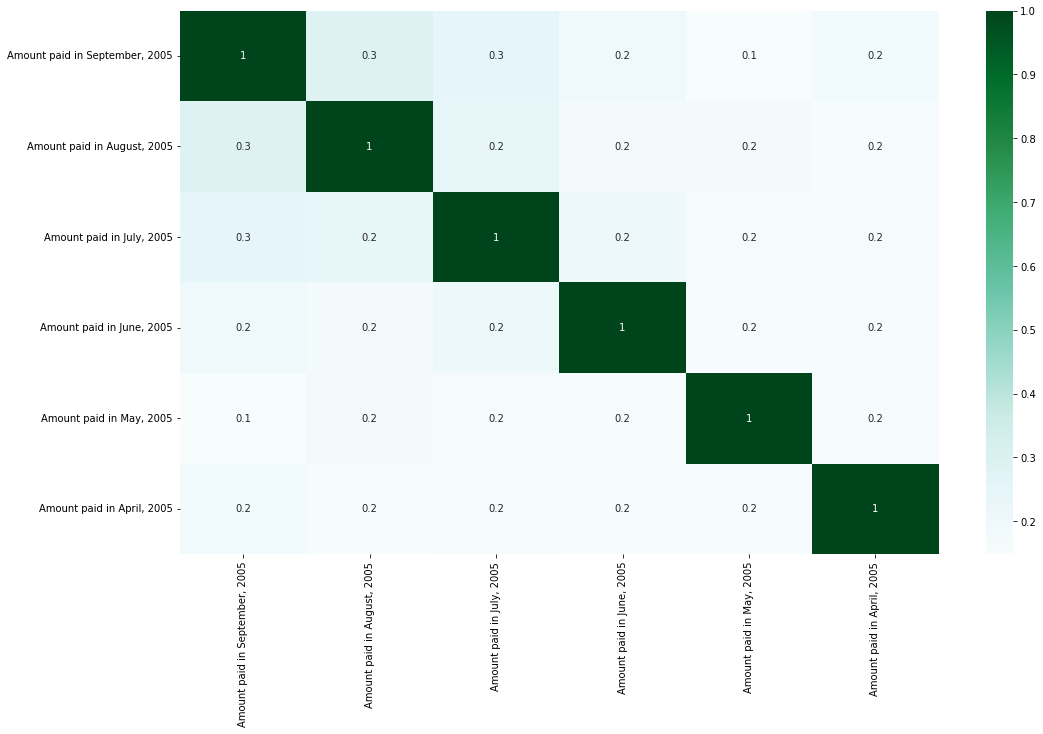

In [83]:
fig, ax = plt.subplots(figsize=(17,10))
amount_paid = data_final[col1_filter]
amount_paid_status = amount_paid.corr()
corr_map_3 = sns.heatmap(amount_paid_status, annot=True, cmap='BuGn', fmt='.1g', ax=ax)

La correlación entre estas variables es mucho menor y es posible que cuando se haga un PCA no se logré representar toda la variabilidad en pocos componentes

In [89]:
sc3 = StandardScaler()
var_col3 = data_final[col1_filter]
scaled_var3 = sc3.fit_transform(var_col3)
scaled_var3_frame = pd.DataFrame(scaled_var3, columns=col1_filter)

In [90]:
scaled_var3_frame.columns

Index(['Amount paid in September, 2005', 'Amount paid in August, 2005',
       'Amount paid in July, 2005', 'Amount paid in June, 2005',
       'Amount paid in May, 2005', 'Amount paid in April, 2005'],
      dtype='object')

In [91]:
var_amount_paid = np.cov([scaled_var3_frame['Amount paid in September, 2005'], scaled_var3_frame['Amount paid in August, 2005'], \
                scaled_var3_frame['Amount paid in July, 2005'], scaled_var3_frame['Amount paid in June, 2005'],scaled_var3_frame['Amount paid in May, 2005'], \
                scaled_var3_frame['Amount paid in April, 2005']])
var_frame3 = pd.DataFrame(var_amount_paid, columns=col1_filter, index=col1_filter)
var_frame3

,"Amount paid in September, 2005","Amount paid in August, 2005","Amount paid in July, 2005","Amount paid in June, 2005","Amount paid in May, 2005","Amount paid in April, 2005"
"Amount paid in September, 2005",1.000033,0.285592,0.252183,0.199571,0.148449,0.185725
"Amount paid in August, 2005",0.285592,1.000033,0.244757,0.180081,0.180886,0.157596
"Amount paid in July, 2005",0.252183,0.244757,1.000033,0.216327,0.159152,0.162707
"Amount paid in June, 2005",0.199571,0.180081,0.216327,1.000033,0.151815,0.157793
"Amount paid in May, 2005",0.148449,0.180886,0.159152,0.151815,1.000033,0.154858
"Amount paid in April, 2005",0.185725,0.157596,0.162707,0.157793,0.154858,1.000033


La varianza explicada en la matriz de covarianza muestra que las características no logran explicarse entre ellas. Procederemos a realizar en análisis de reducción de dimensionalidad y probar cuantoas componentes son necesarias para explicar por lo menos el `90%` de la variabilidad de las características.

In [92]:
var_col_3 = scaled_var3_frame
total3 = var_col_3.var().sum()
var_1_, var_2_, var_3_, var_4_, var_5_, var_6_ = var_amount_paid[0][0], var_amount_paid[1][1], var_amount_paid[2][2], var_amount_paid[3][3], var_amount_paid[4][4], var_amount_paid[5][5]

In [93]:
print('Varianza total \t\t\t:', total3.round(2) )
print(f'Varienza prop. {col1_filter[0]} \t:', ((var_1_/total3)*100).round(2),'%' )
print(f'Varienza prop. {col1_filter[1]} \t:', ((var_2_/total3)*100).round(2),'%' )
print(f'Varienza prop. {col1_filter[2]} \t:', ((var_3_/total3)*100).round(2),'%' )
print(f'Varienza prop. {col1_filter[3]} \t:', ((var_4_/total3)*100).round(2),'%' )
print(f'Varienza prop. {col1_filter[4]} \t:', ((var_5_/total3)*100).round(2),'%' )
print(f'Varienza prop. {col1_filter[5]} \t:', ((var_6_/total3)*100).round(2),'%' )

Varianza total 			: 6.0
Varienza prop. Amount paid in September, 2005 	: 16.67 %
Varienza prop. Amount paid in August, 2005 	: 16.67 %
Varienza prop. Amount paid in July, 2005 	: 16.67 %
Varienza prop. Amount paid in June, 2005 	: 16.67 %
Varienza prop. Amount paid in May, 2005 	: 16.67 %
Varienza prop. Amount paid in April, 2005 	: 16.67 %


Se identifica varianza en proporciones iguales, analizaremos los cuatro componentes de la reducción de dimensionalidad

In [94]:
pcs2 = PCA(n_components=4)
pcs2.fit(scaled_var3)

pcsSummary2 = pd.DataFrame({'Desviación estandar': np.sqrt(pcs2.explained_variance_),'Proporción de la varianza': pcs2.explained_variance_ratio_,\
                          'Proporción acumulada': np.cumsum(pcs2.explained_variance_ratio_)})
pcsSummary2 = pcsSummary2.transpose()
pcsSummary2.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pcsSummary2 = pcsSummary2.round(3)
pcsSummary2

,PC1,PC2,PC3,PC4
Desviación estandar,1.399,0.945,0.923,0.915
Proporción de la varianza,0.326,0.149,0.142,0.140
Proporción acumulada,0.326,0.475,0.617,0.757


Se observa que los cuatro primeros componentes no son capaces de representar el `90%` de variabilidad, solo un `75.7%`. Podremos la cantidad de columnas en la cantidad de componentes

In [96]:
pcs2 = PCA(n_components=6)
pcs2.fit(scaled_var3)

pcsSummary2 = pd.DataFrame({'Desviación estandar': np.sqrt(pcs2.explained_variance_),'Proporción de la varianza': pcs2.explained_variance_ratio_,\
                          'Proporción acumulada': np.cumsum(pcs2.explained_variance_ratio_)})
pcsSummary2 = pcsSummary2.transpose()
pcsSummary2.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
pcsSummary2 = pcsSummary2.round(3)
pcsSummary2

,PC1,PC2,PC3,PC4,PC5,PC6
Desviación estandar,1.399,0.945,0.923,0.915,0.868,0.841
Proporción de la varianza,0.326,0.149,0.142,0.140,0.126,0.118
Proporción acumulada,0.326,0.475,0.617,0.757,0.882,1.000


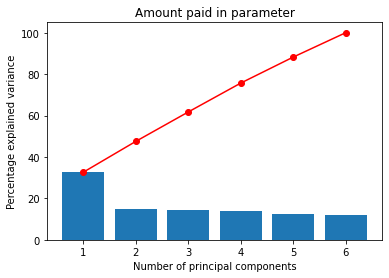

In [97]:
display_scree_plot(pcs2, name='Amount paid in parameter')

Con cinco componentes solo es posible explicar el `88%` de la varianza. Esto se debe a la poca correlación que existe entre las variables

#### **Variable:** Todo el conjunto de variables

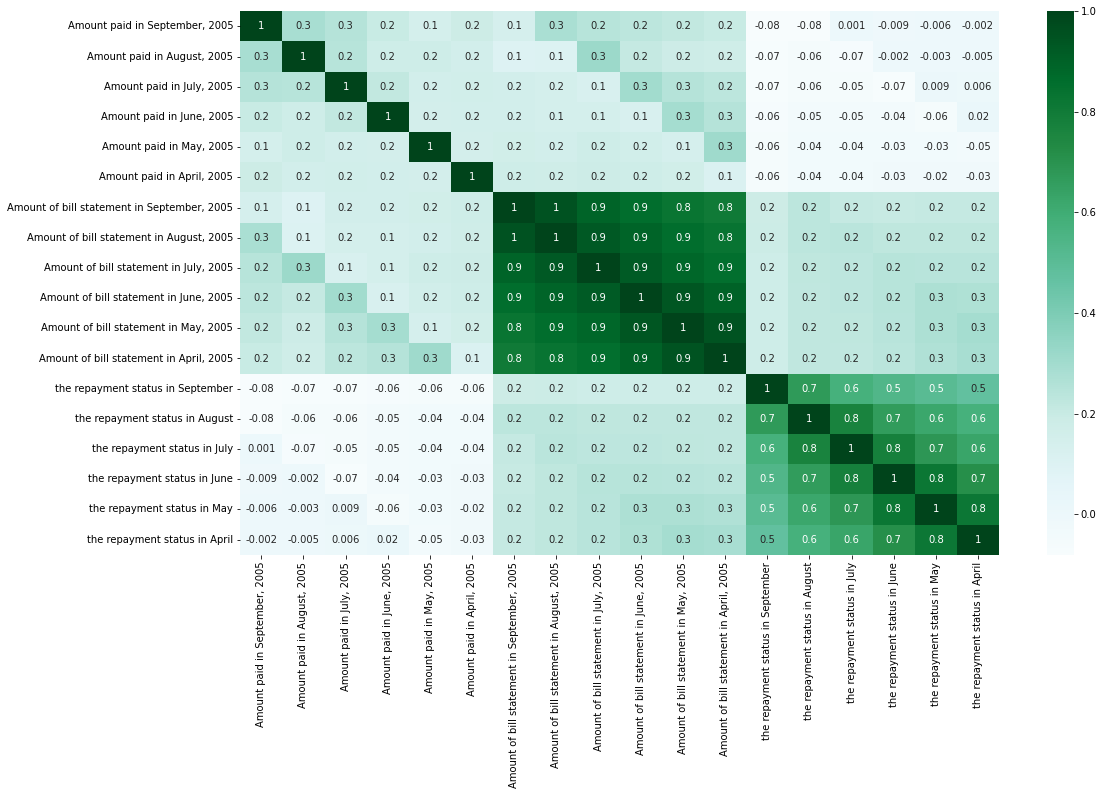

In [101]:
fig, ax = plt.subplots(figsize=(17,10))
final_all = data_final[col1_filter+col2_filter+col3_filter]
final_all_status = final_all.corr()
corr_map_4 = sns.heatmap(final_all_status, annot=True, cmap='BuGn', fmt='.1g', ax=ax)

Los colores más oscuros muestran la fuerte correlación entre varibles. Como lo observamos en los ejercicios anteriores, acá se envidencia el mismo comportamiento. Solo se tratará de observar si una reducción de características permite explicar las 18 variables aća representadas.

In [102]:
sc3 = StandardScaler()
var_col4 = data_final[col1_filter+col2_filter+col3_filter]
scaled_var4 = sc3.fit_transform(var_col4)
scaled_var4_frame = pd.DataFrame(scaled_var4, columns=col1_filter+col2_filter+col3_filter)

In [104]:
col_total = col1_filter + col2_filter + col3_filter
list_col = []
for col in col_total:
    var = scaled_var4_frame[col]
    list_col.append(var)
    
# COVARIANZA
# =================================
var_total = np.cov(list_col)
var_col_4 = scaled_var4_frame
total4 = var_col_4.var().sum()

list_var = []
for row in range(len(col_total)):
    var = var_total[row][row]
    list_var.append(var)

In [105]:
print('Varianza total \t\t\t:', total4.round(2) )

for i in range(len(col_total)):
    print(f'Varienza prop. {col_total[i]} \t:', ((list_var[i]/total3)*100).round(2),'%' )

Varianza total 			: 18.0
Varienza prop. Amount paid in September, 2005 	: 16.67 %
Varienza prop. Amount paid in August, 2005 	: 16.67 %
Varienza prop. Amount paid in July, 2005 	: 16.67 %
Varienza prop. Amount paid in June, 2005 	: 16.67 %
Varienza prop. Amount paid in May, 2005 	: 16.67 %
Varienza prop. Amount paid in April, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in September, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in August, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in July, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in June, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in May, 2005 	: 16.67 %
Varienza prop. Amount of bill statement in April, 2005 	: 16.67 %
Varienza prop. the repayment status in September 	: 16.67 %
Varienza prop. the repayment status in August 	: 16.67 %
Varienza prop. the repayment status in July 	: 16.67 %
Varienza prop. the repayment status in June 	: 16.67 %
Varienza prop. the repayment sta

Las proporciones son iguales.

In [108]:
pcs3 = PCA(n_components=9)
pcs3.fit(scaled_var4)

pcsSummary3 = pd.DataFrame({'Desviación estandar': np.sqrt(pcs3.explained_variance_),'Proporción de la varianza': pcs3.explained_variance_ratio_,\
                          'Proporción acumulada': np.cumsum(pcs3.explained_variance_ratio_)})
pcsSummary3 = pcsSummary3.transpose()
pcsSummary3.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8', 'PC9']
pcsSummary3 = pcsSummary3.round(3)
pcsSummary3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Desviación estandar,2.552,1.926,1.227,0.957,0.942,0.934,0.885,0.856,0.827
Proporción de la varianza,0.362,0.206,0.084,0.051,0.049,0.048,0.043,0.041,0.038
Proporción acumulada,0.362,0.568,0.652,0.702,0.752,0.800,0.844,0.884,0.922


Observamos que para las 18 características, poder explicar por lo menos el `88%` de la variabilidad, necesitariamos aproximadamente 8 componentes. Para 9 componente tenemos una explicación del `92.2%`. Se redujo a la mitad la cantidad de características

### **Paso 2: Interprete cada componente principal en términos de las variables originales**

#### **Variable:** the repayment status

Se buscará cual es la variable más importantes para cada uno de los casos considerados.

In [58]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = data_final[col3_filter].columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4
the repayment status in September,0.351402,-0.658782,-0.593337,0.262386
the repayment status in August,0.407650,-0.401432,0.311808,-0.565676
the repayment status in July,0.423720,-0.102807,0.569792,0.084872
the repayment status in June,0.432448,0.220166,0.186149,0.595288
the repayment status in May,0.426487,0.390996,-0.194081,0.098631
the repayment status in April,0.402365,0.439247,-0.392103,-0.489761


In [118]:
print('La variables más importante para el conjunto THE REPAYMENT STATUS es:', np.abs(pcsComponents_df['PC4']).idxmax())
print('El valor de la variables más importante es:', round(np.abs(pcsComponents_df['PC4']).max(),3))

La variables más importante para el conjunto THE REPAYMENT STATUS es: the repayment status in June
El valor de a variables más importante es: 0.595


Para este caso fueron necesarias 3 componenete para explicar al menos el 90% de la variabilidad de las características. La que tuvo mayor importancia fue `the repayment status in june` con un valor de 0.595 positivo.

#### **Variable:** Amount of bill statement in

In [79]:
pcsComponents_df1 = pd.DataFrame(pcs1.components_.transpose(), 
                                columns = pcsSummary1.columns,
                                index = data_final[col2_filter].columns
                                )
pcsComponents_df1

,PC1,PC2,PC3,PC4
"Amount of bill statement in September, 2005",0.400877,0.536457,-0.457310,-0.224205
"Amount of bill statement in August, 2005",0.410555,0.428852,-0.115991,0.090257
"Amount of bill statement in July, 2005",0.412034,0.175534,0.622221,0.554556
"Amount of bill statement in June, 2005",0.414762,-0.180810,0.439746,-0.591702
"Amount of bill statement in May, 2005",0.410293,-0.430109,-0.080279,-0.275519
"Amount of bill statement in April, 2005",0.400753,-0.528963,-0.436386,0.456105


In [120]:
print('La variables más importante para el conjunto AMOUNT OF BILL STATEMENT IN es:', np.abs(pcsComponents_df1['PC1']).idxmax())
print('El valor de la variables más importante es:', round(np.abs(pcsComponents_df1['PC1']).max(),3))

La variables más importante para el conjunto AMOUNT OF BILL STATEMENT IN es: Amount of bill statement in June, 2005
El valor de la variables más importante es: 0.415


Para este caso fueron necesarias 3 componenete para explicar al menos el 90% de la variabilidad de las características. La que tuvo mayor importancia fue `Amount of bill statement in June, 2005` con un valor de 0.415 positivo. Para este caso se observa que las diferencias de la primer componente es muy similar, debido a su alta correlación, se da la posibilidad de tener una importancia similar para cada característica.

#### **Variable:** Amount paid in

In [100]:
pcsComponents_df2 = pd.DataFrame(pcs2.components_.transpose(), 
                                columns = pcsSummary2.columns,
                                index = data_final[col1_filter].columns
                                )
pcsComponents_df2

,PC1,PC2,PC3,PC4,PC5,PC6
"Amount paid in September, 2005",0.453626,0.334123,-0.053064,-0.285881,-0.295844,-0.714506
"Amount paid in August, 2005",0.445846,0.278082,0.264592,-0.345576,-0.312278,0.661016
"Amount paid in July, 2005",0.440287,0.293583,0.031313,0.111147,0.840318,0.022084
"Amount paid in June, 2005",0.391729,0.037839,-0.195357,0.834037,-0.323637,0.081200
"Amount paid in May, 2005",0.347516,-0.671758,0.630034,0.042121,0.027997,-0.168737
"Amount paid in April, 2005",0.356894,-0.521680,-0.700777,-0.298503,0.057435,0.130330


In [121]:
print('La variables más importante para el conjunto AMOUNT PAID IN es:', np.abs(pcsComponents_df2['PC5']).idxmax())
print('El valor de a variables más importante es:', round(np.abs(pcsComponents_df2['PC5']).max(),3))

La variables más importante para el conjunto AMOUNT PAID IN es: Amount paid in July, 2005
El valor de a variables más importante es: 0.84


#### **Variable:** Total

Para este caso fueron necesarias 3 componenete para explicar al menos el 90% de la variabilidad de las características. La que tuvo mayor importancia fue `Amount paid in July, 2005` con un valor de 0.84 positivo.

In [109]:
pcsComponents_df3 = pd.DataFrame(pcs3.components_.transpose(), 
                                columns = pcsSummary3.columns,
                                index = data_final[col1_filter+col2_filter+col3_filter].columns
                                )
pcsComponents_df3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
"Amount paid in September, 2005",0.090726,0.162822,0.407504,0.322154,-0.248571,0.015747,-0.236188,-0.729013,0.115531
"Amount paid in August, 2005",0.075357,0.152451,0.443702,0.259232,-0.246635,0.386552,-0.280167,0.596325,0.113392
"Amount paid in July, 2005",0.082613,0.163184,0.402692,0.231376,0.259812,-0.019080,0.783930,0.025170,0.139588
"Amount paid in June, 2005",0.074211,0.151028,0.340938,-0.106039,0.672360,-0.384278,-0.441178,0.075554,0.035234
"Amount paid in May, 2005",0.071672,0.144238,0.264671,-0.749364,0.053415,0.518949,0.059126,-0.182906,-0.059670
"Amount paid in April, 2005",0.066292,0.134152,0.295588,-0.382896,-0.530613,-0.636005,0.110332,0.164333,-0.072265
"Amount of bill statement in September, 2005",0.331468,0.164995,-0.220611,-0.053765,-0.030396,-0.059225,0.011390,0.010790,0.046728
"Amount of bill statement in August, 2005",0.343044,0.167009,-0.189373,0.015411,-0.078254,-0.046836,-0.036357,-0.132385,0.041284
"Amount of bill statement in July, 2005",0.346950,0.173612,-0.126126,0.052644,-0.137365,0.074643,-0.121374,0.100129,0.010343
"Amount of bill statement in June, 2005",0.351052,0.171617,-0.114549,0.088529,-0.031362,0.021147,0.125385,0.034062,-0.024051


In [122]:
print('La variables más importante para el conjunto TOTAL es:', np.abs(pcsComponents_df3['PC9']).idxmax())
print('El valor de a variables más importante es:', round(np.abs(pcsComponents_df3['PC9']).max(),3))

La variables más importante para el conjunto TOTAL es: the repayment status in September
El valor de a variables más importante es: 0.642


Para este caso fueron necesarias 3 componenete para explicar al menos el 90% de la variabilidad de las características. La que tuvo mayor importancia fue `the repayment status in September` con un valor de 0.642 positivo. Aquí por tener tantas características, la variación es evidente en la anterior tabla, donde el menor valor es de 0.010

### **Paso 3: Identifique valores atípicos**

In [123]:
data_final.shape

(29961, 25)

Se realizará el escalado de cada variable para guardar las misma dimensiones

In [125]:
scal = StandardScaler()
data_scaled = scal.fit_transform(data_final)
data_scaled_frame = pd.DataFrame(data_scaled, columns=data_final.columns)
data_scaled_frame.head()

,ID,Amount of the given credit,Gender,Education,Marital status,Age,the repayment status in September,the repayment status in August,the repayment status in July,the repayment status in June,...,"Amount of bill statement in June, 2005","Amount of bill statement in May, 2005","Amount of bill statement in April, 2005","Amount paid in September, 2005","Amount paid in August, 2005","Amount paid in July, 2005","Amount paid in June, 2005","Amount paid in May, 2005","Amount paid in April, 2005",Class
0,-1.712382,2.562162,0.809621,-1.079186,-1.057057,0.273136,0.015264,0.111971,0.139456,0.189259,...,1.238097,1.126279,0.523250,3.882680,1.059678,1.406104,0.967750,3.099373,0.830843,-0.532871
1,-1.708107,1.097758,0.809621,-1.079186,0.858651,-0.052465,-0.874472,-0.723380,-0.696695,-0.666648,...,-0.672435,-0.663046,-0.652720,-0.067864,-0.251582,-0.296818,-0.308131,-0.314178,-0.293508,-0.532871
2,-1.705796,-0.212499,0.809621,0.185917,2.774358,-0.378065,0.015264,0.111971,0.139456,0.189259,...,-0.376177,-0.393268,-0.377744,-0.160913,-0.170298,-0.172051,-0.244337,-0.117933,-0.158642,1.876628
3,-1.733410,-1.137386,0.809621,0.185917,-1.057057,-1.246334,1.794737,1.782673,-0.696695,-0.666648,...,-0.672435,-0.663046,-0.652720,-0.341943,-0.227162,-0.296818,-0.308131,-0.314178,-0.293508,1.876628
4,-1.733294,-0.366647,0.809621,0.185917,0.858651,-1.029267,-0.874472,1.782673,0.139456,0.189259,...,-0.621599,-0.606243,-0.597987,-0.341943,-0.213673,-0.240054,-0.244337,-0.314178,-0.181073,1.876628


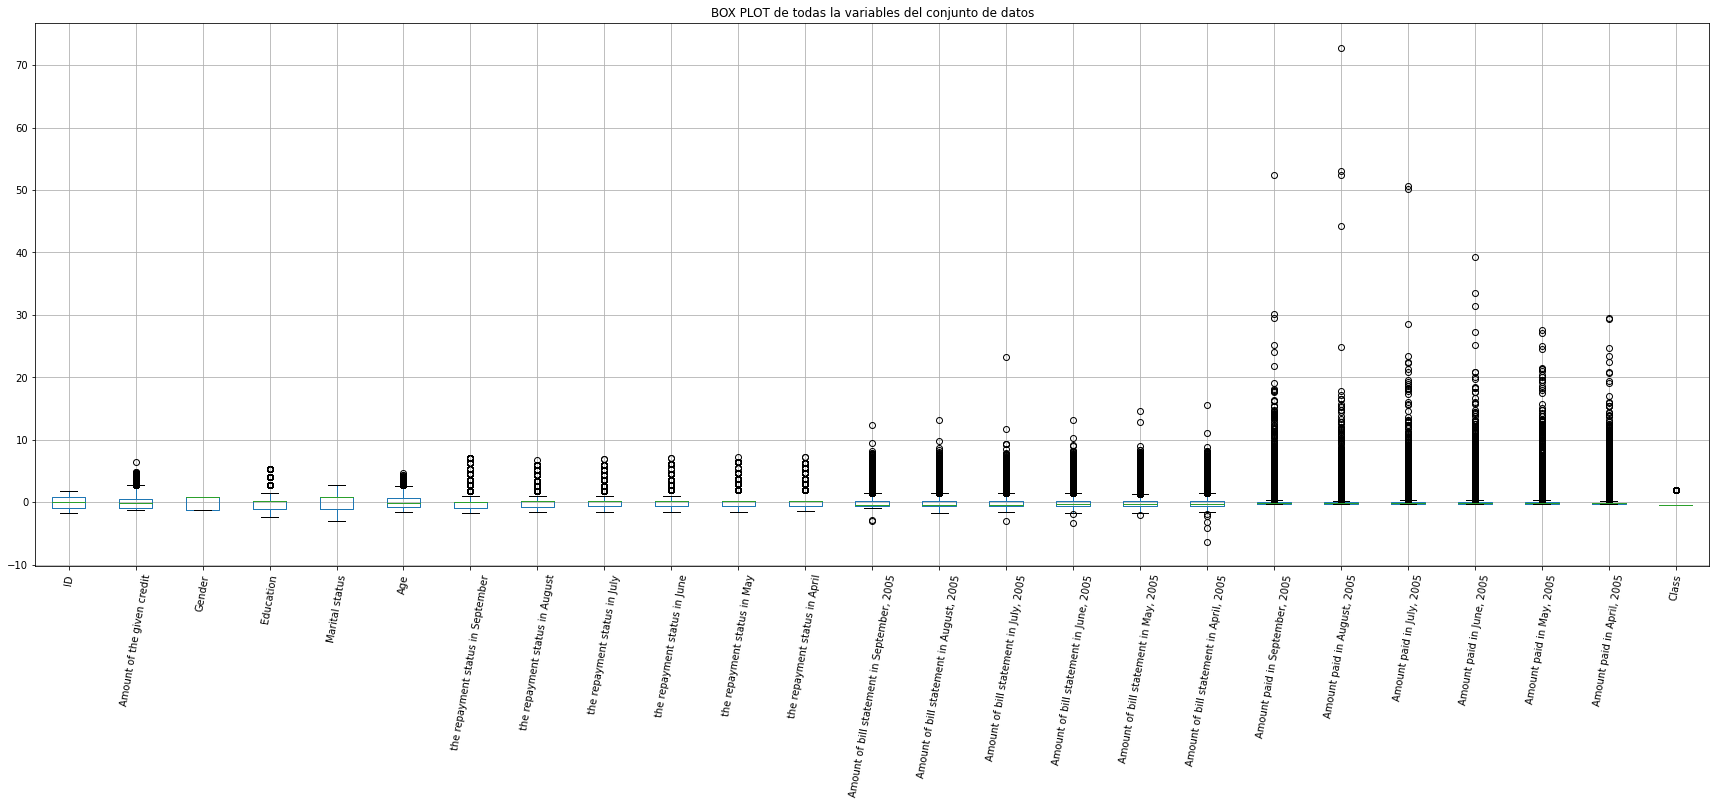

In [133]:
fig, ax2 = plt.subplots(figsize=(30,10))
data_scaled_frame.boxplot(ax=ax2, rot=80, fontsize=10)
ax2.set_title('BOX PLOT de todas la variables del conjunto de datos')
plt.show()

Se observa que casi todas las variables sobrepasan el `max value` del gráfico de caja, especialmente para el tipo de variable `Amount paid in`. La caja que representa el `Q1` y el `Q3` es muy pequeño comparado con la cantidad de atípicos o punto encima del valor máximo. Esto muestra que las distribuciones de estás variables están sesgadas hacía la izquierda y existe un cantidad sigificativa de valores altos para estas variables [Sin dejar pasar que para `Amount of bill statemente` y `the repayment status in` contiene atípicos]. Esto permite realizar también para este conjuntos de datos un análisis de atípicos que permitan ya sea suavizar o eliminar estos valores [Dependiendo de lo que se quiera en el negocio] y poder emplear nuevamente la reducción de dimensionalidad. Ya que para este último conjunto de datos es donde se necesitan más componente y es posible que está cantidad de atípicos afecta la variabilidad de cada característica. 

Adicionalmente, la variable `ID` y `Class` son variables que no entrarían a consideración para este caso, ya que el son variables representativas de cada cliente y la otra en la variable objetivo.

## **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

### 1. ¿Cuál es el número de componentes mínimo y por qué?

`RTA`

Para el escenario propuesto en este notebook se realizaron varios pasos para los siguientes tipos de variables: `the repayment status`, `Amount of bill statement in` y `Amount paid in`

* `the repayment status`: Mostró que la cantidad de componente para reducir dimensionalidad fueron `n_components` 3, explicando el `90.1%` de la variabilidad de las seis características representadas aquí. Un valor margen para poder dejar esta cantidad de variables es `90%`, y esta cantidad de componente cumple con este margen. Esto se puede evidenciar también en la matriz de correlación, donde algunas características poseen una correlación de `0.5` y `0.6`, dando que del total de seis variables, se infiere que tres componentes podrían representar el `90%` de la variabilidad.
* `Amount of bill statement in`: Observando en la matriz de correlación de este conjunto de características, se observa valores altos, `0.9`, considerando que la máxima correlación es `1.0`. Esto infiere a que se necesitarán pocas componentes para representar el `90%` de la variabilidad. Al realizar el análisis de componentes, se muestra que solo una componente explicar el `90.6%` de la variabilidad, consecuencia de la fuerte correlación.
* `Amount paid in`: La matriz de correlación muestra valores bajos de `0.2`, un posible indicio de necesitar muchas componentes para explicar la variabilidad. **PCA**, 5 componente solo explican el `88.2%` de la variabilidad, considerando que son 6 característica se tendría que evaluar otra metodología para reducir dimensionalidad.
* `total de variables`: Para todas las variables anteriormente consideradas que son 18 en total, se necesito de 8 componente para explicar el `88.2%`de la variabilidad, poca correlación entre todas estas. 


### 2.¿Cuál es la variación de los datos que representan esos componentes?

`RTA`

* La variación total para el primer caso con las variables `the repayment status` se tiene una varianza total de `8.09` con una varianza en cada una de estas de `16.7%`. La explicación de la varianza para este paso fue del `90.1%` para los tres componentes.
* La variación total para las variables `Amount of bill statement in` tiene una varianza de `6.0` con una varianza por cada una de `16.7%`. La proporción de varianza acumulada para este caso fue de `90.6%` para una sola componente.
* La variación total para las variables `Amount paid in` tiene una varianza de `6.0` con una varianza para cada una de `16.7%`. La proporción de varianza para esta caso fue de `88.8%`para cinco componentes.
* Para la unificación de las 18 características, se tiene una varianza `18` con un porcentaje para cada características de `16.7%`. Para este caso fueron necesesarias 8 componente para explicar el `88.2%`de la varianza de cada una de estas.

### 3. ¿Cuál es la pérdida de información después de realizar PCA?

`RTA`

Para cada uno de los casos anteriormente mencionados, si seleccionamos las componentes establecidas en cada paso, se tendría la perdida de información:

* `the repayment status`: 9.9%
* `Amount of bill statement in`: 9.4%
* `Amount paid in`: 11.8%
* `Total de variables`: 11.8%

### 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

`RTA`

Las importancia se clasifica de la siguiente manera:

`the repayment status`

**Mayor importancia**
* La variables más importante para el conjunto: ***the repayment status in June***
* El valor de a variable más importante es: ***0.595***

**Menor importancia**
* La variables menos importante para el conjunto: ***the repayment status in July***
* El valor de a variable menos importante es: ***0.0848***

`Amount of bill statement in`

**Mayor importancia**
* La variables más importante para el conjunto: ***Amount of bill statement in June, 2005***
* El valor de a variable más importante es: ***0.415***

**Menor importancia**
* La variables menos importante para el conjunto: ***Amount of bill statement in April, 2005***
* El valor de a variable menos importante es: ***0.4007***

`Amount paid in`

**Mayor importancia**
* La variables más importante para el conjunto: ***Amount paid in July, 2005***
* El valor de a variable más importante es: ***0.84***

**Menor importancia**
* La variables menos importante para el conjunto: ***Amount paid in May, 2005***
* El valor de a variable menos importante es: ***0.027***

`Todas las variables en conjunto`

**Mayor importancia**
* La variables más importante para el conjunto: ***the repayment status in September***
* El valor de a variable más importante es: ***0.642***

**Menor importancia**
* La variables menos importante para el conjunto: ***the repayment status in May***
* El valor de a variable menos importante es: ***0.0090***

### 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

`RTA`

Cuando se trabaja con método de machine learning existe la posibilidad tener variables que pueden ser redudantes, ya que unas pueden explicar otras. Normalmente se hace una análisis de colinearidad para quedarnos con aquellas que son representativas y únicas. Sin embargo, `PCA` es una solución para quedarnos con aquellas componentes que pueden ser representativas. Con esto, aplicar PCA trae beneficios para reducir la dimensionalidad de nuesto conjunto de datos donde existen variables que pueden ser explicadas por las componente seleccionadas para la reducción. Esto evita tener colinealidad en los métodos, también reduciría los tiempos de computo ya que se tendrían menos campos a la derecha (características). PCA trata de explicar la variabilidad de todas las características en unas pocas componentes